In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
# %matplotlib qt

## The backpropagation algorithm is implemented as follows:

In [2]:
""" 
The update equations are mentioned as follows:
1) Weight update from hidden to output layer: W_jh = W_jh - eta * ( S(Z)^T . {(S(Y)-d) * Sd_Y} ) 
2) Weight update from input to hidden layer: W_hi = W_hi - eta * X^T . ({(S(Y)-d) * Sd_Y} . W_jh^T * Sd_Z) 
3) Bias updates for output layer: bo = bo - eta * sum({(S(Y)-d) * Sd_Y})
4) Bias updates for hidden layer: bh = bh - eta * sum({(S(Y)-d) * Sd_Y} . W_jh^T * Sd_Z )

where, * = elementwise product, . = dot product, ()^T = transpose operation,
eta = learning rate, Z = hidden layer activation potential, S(Z) = hidden layer activation,
Y = output layer activation potential, S(Y) = output layer activation, Sd_Z = derivative of S(Z), 
Sd_Y = derivative of S(Y)
"""

def forward_pass(X, W_hi, W_jh, b_h, b_o):
      
    # hidden layer
    Z = np.dot(X, W_hi) + b_h  # hidden layer activation potential
    S_Z = sigmod_fun(Z)       # hidden layer output
    
    # Output layer
    Y = np.dot(S_Z, W_jh) + b_o  # output layer activation potential
    S_Y = sigmod_fun(Y)          # output layer output
    return Z, Y, S_Z, S_Y

def back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta):
    e = ((S_Y - d)/X.shape[1])
#     e = (S_Y - d)
    Sd_Y = sigmod_deriv_fun(Y) # Compute the derivative of the S(Y)
    Sd_Z = sigmod_deriv_fun(Z) # Compute the derivative of the S(Z)
    sc_error = e*Sd_Y          # Compute the scaled error   
    
    # output bias update
    b_o = b_o - eta*np.sum(sc_error)
    
    # hidden bias update
    b_h = b_h - eta*np.sum(np.dot(sc_error, W_jh.T)*Sd_Z)    
    
    # weight update input to hidden
    W_hi = W_hi - eta*np.dot(X.T,(np.dot(sc_error, W_jh.T)*Sd_Z))
    
    # weight update hidden to output
    W_jh = W_jh - eta * np.dot(S_Z.T,sc_error) 

    return W_jh, W_hi, b_o, b_h

def sigmod_fun(X):
    return 1/(1+np.exp(-X))

def sigmod_deriv_fun(X):
    X_sig = sigmod_fun(X)
    Z = X_sig*(1-X_sig)
    return Z


## Training:

In [3]:
c = np.load('mnist_14_14.npz') 
X_train = c['x_train']
X = X_train
d = X
print(X.shape)
X_test = c['x_test']
X_test = X_test
d_test = X_test

epochs = 10000
eta = 0.1
num_in_node, num_hid_node, num_op_node = X_train.shape[1],32,X_train.shape[1]

# initialize weights and biases
r = math.sqrt(6) / math.sqrt(num_in_node + num_hid_node + 1)
W_hi = np.random.uniform(low = -r, high = r, size = (num_in_node,num_hid_node))
W_jh =  np.random.uniform(low = -r, high = r, size = (num_hid_node,num_op_node))
b_h =  np.random.uniform(size = (1,num_hid_node))
b_o =  np.random.uniform(size = (1,num_op_node))

Wo = np.zeros((num_hid_node,num_op_node))
error_epoch = np.zeros((epochs,1))
print('training in progress..............')
for i in range(epochs):
    Z, Y, S_Z, S_Y = forward_pass(X, W_hi, W_jh, b_h, b_o)
    W_jh, W_hi, b_o, b_h = back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta)
    error = ((S_Y - d)*(S_Y - d)).flatten()
    error_epoch[i] = np.sum(error)/len(error)
    print('iter = ', i, 'error = ',error_epoch[i])
        
print('training completed ...............')
        


(499, 196)
training in progress..............
iter =  0 error =  [0.32807806]
iter =  1 error =  [0.09139811]
iter =  2 error =  [0.09130861]
iter =  3 error =  [0.09120997]
iter =  4 error =  [0.09110076]
iter =  5 error =  [0.09097923]
iter =  6 error =  [0.09084323]
iter =  7 error =  [0.09069013]
iter =  8 error =  [0.09051659]
iter =  9 error =  [0.09031841]
iter =  10 error =  [0.09009019]
iter =  11 error =  [0.08982489]
iter =  12 error =  [0.08951324]
iter =  13 error =  [0.08914276]
iter =  14 error =  [0.08869642]
iter =  15 error =  [0.08815054]
iter =  16 error =  [0.08747157]
iter =  17 error =  [0.08661137]
iter =  18 error =  [0.08550029]
iter =  19 error =  [0.08403874]
iter =  20 error =  [0.08209209]
iter =  21 error =  [0.07950697]
iter =  22 error =  [0.07619307]
iter =  23 error =  [0.07230898]
iter =  24 error =  [0.06842424]
iter =  25 error =  [0.06525222]
iter =  26 error =  [0.06294538]
iter =  27 error =  [0.06111375]
iter =  28 error =  [0.05951799]
iter = 

iter =  246 error =  [0.04198702]
iter =  247 error =  [0.04192029]
iter =  248 error =  [0.04185357]
iter =  249 error =  [0.04178687]
iter =  250 error =  [0.04172018]
iter =  251 error =  [0.04165352]
iter =  252 error =  [0.04158688]
iter =  253 error =  [0.04152028]
iter =  254 error =  [0.04145373]
iter =  255 error =  [0.04138722]
iter =  256 error =  [0.04132076]
iter =  257 error =  [0.04125436]
iter =  258 error =  [0.04118802]
iter =  259 error =  [0.04112175]
iter =  260 error =  [0.04105555]
iter =  261 error =  [0.04098943]
iter =  262 error =  [0.0409234]
iter =  263 error =  [0.04085744]
iter =  264 error =  [0.04079159]
iter =  265 error =  [0.04072582]
iter =  266 error =  [0.04066016]
iter =  267 error =  [0.04059461]
iter =  268 error =  [0.04052916]
iter =  269 error =  [0.04046383]
iter =  270 error =  [0.04039861]
iter =  271 error =  [0.04033352]
iter =  272 error =  [0.04026855]
iter =  273 error =  [0.04020371]
iter =  274 error =  [0.040139]
iter =  275 error

iter =  488 error =  [0.03018793]
iter =  489 error =  [0.03015603]
iter =  490 error =  [0.03012423]
iter =  491 error =  [0.03009252]
iter =  492 error =  [0.03006091]
iter =  493 error =  [0.0300294]
iter =  494 error =  [0.02999798]
iter =  495 error =  [0.02996665]
iter =  496 error =  [0.02993542]
iter =  497 error =  [0.02990428]
iter =  498 error =  [0.02987324]
iter =  499 error =  [0.02984229]
iter =  500 error =  [0.02981143]
iter =  501 error =  [0.02978066]
iter =  502 error =  [0.02974999]
iter =  503 error =  [0.0297194]
iter =  504 error =  [0.02968891]
iter =  505 error =  [0.02965851]
iter =  506 error =  [0.0296282]
iter =  507 error =  [0.02959797]
iter =  508 error =  [0.02956784]
iter =  509 error =  [0.0295378]
iter =  510 error =  [0.02950784]
iter =  511 error =  [0.02947798]
iter =  512 error =  [0.0294482]
iter =  513 error =  [0.02941851]
iter =  514 error =  [0.0293889]
iter =  515 error =  [0.02935939]
iter =  516 error =  [0.02932995]
iter =  517 error = 

iter =  733 error =  [0.02449735]
iter =  734 error =  [0.02448052]
iter =  735 error =  [0.02446373]
iter =  736 error =  [0.02444698]
iter =  737 error =  [0.02443026]
iter =  738 error =  [0.02441358]
iter =  739 error =  [0.02439694]
iter =  740 error =  [0.02438034]
iter =  741 error =  [0.02436377]
iter =  742 error =  [0.02434724]
iter =  743 error =  [0.02433075]
iter =  744 error =  [0.02431429]
iter =  745 error =  [0.02429787]
iter =  746 error =  [0.02428149]
iter =  747 error =  [0.02426514]
iter =  748 error =  [0.02424883]
iter =  749 error =  [0.02423256]
iter =  750 error =  [0.02421632]
iter =  751 error =  [0.02420012]
iter =  752 error =  [0.02418395]
iter =  753 error =  [0.02416782]
iter =  754 error =  [0.02415172]
iter =  755 error =  [0.02413566]
iter =  756 error =  [0.02411964]
iter =  757 error =  [0.02410365]
iter =  758 error =  [0.0240877]
iter =  759 error =  [0.02407178]
iter =  760 error =  [0.02405589]
iter =  761 error =  [0.02404004]
iter =  762 err

iter =  979 error =  [0.02124361]
iter =  980 error =  [0.02123318]
iter =  981 error =  [0.02122276]
iter =  982 error =  [0.02121236]
iter =  983 error =  [0.02120198]
iter =  984 error =  [0.02119162]
iter =  985 error =  [0.02118127]
iter =  986 error =  [0.02117094]
iter =  987 error =  [0.02116063]
iter =  988 error =  [0.02115033]
iter =  989 error =  [0.02114005]
iter =  990 error =  [0.02112979]
iter =  991 error =  [0.02111954]
iter =  992 error =  [0.02110931]
iter =  993 error =  [0.0210991]
iter =  994 error =  [0.0210889]
iter =  995 error =  [0.02107872]
iter =  996 error =  [0.02106856]
iter =  997 error =  [0.02105841]
iter =  998 error =  [0.02104828]
iter =  999 error =  [0.02103817]
iter =  1000 error =  [0.02102807]
iter =  1001 error =  [0.02101799]
iter =  1002 error =  [0.02100792]
iter =  1003 error =  [0.02099787]
iter =  1004 error =  [0.02098784]
iter =  1005 error =  [0.02097782]
iter =  1006 error =  [0.02096781]
iter =  1007 error =  [0.02095783]
iter =  

iter =  1216 error =  [0.01915417]
iter =  1217 error =  [0.01914663]
iter =  1218 error =  [0.01913911]
iter =  1219 error =  [0.01913159]
iter =  1220 error =  [0.01912407]
iter =  1221 error =  [0.01911657]
iter =  1222 error =  [0.01910908]
iter =  1223 error =  [0.01910159]
iter =  1224 error =  [0.01909411]
iter =  1225 error =  [0.01908664]
iter =  1226 error =  [0.01907918]
iter =  1227 error =  [0.01907172]
iter =  1228 error =  [0.01906428]
iter =  1229 error =  [0.01905684]
iter =  1230 error =  [0.01904941]
iter =  1231 error =  [0.01904199]
iter =  1232 error =  [0.01903457]
iter =  1233 error =  [0.01902717]
iter =  1234 error =  [0.01901977]
iter =  1235 error =  [0.01901238]
iter =  1236 error =  [0.019005]
iter =  1237 error =  [0.01899762]
iter =  1238 error =  [0.01899026]
iter =  1239 error =  [0.0189829]
iter =  1240 error =  [0.01897555]
iter =  1241 error =  [0.0189682]
iter =  1242 error =  [0.01896087]
iter =  1243 error =  [0.01895354]
iter =  1244 error =  [0

iter =  1459 error =  [0.01752352]
iter =  1460 error =  [0.0175175]
iter =  1461 error =  [0.01751148]
iter =  1462 error =  [0.01750547]
iter =  1463 error =  [0.01749946]
iter =  1464 error =  [0.01749345]
iter =  1465 error =  [0.01748746]
iter =  1466 error =  [0.01748146]
iter =  1467 error =  [0.01747547]
iter =  1468 error =  [0.01746949]
iter =  1469 error =  [0.01746351]
iter =  1470 error =  [0.01745753]
iter =  1471 error =  [0.01745156]
iter =  1472 error =  [0.01744559]
iter =  1473 error =  [0.01743963]
iter =  1474 error =  [0.01743368]
iter =  1475 error =  [0.01742772]
iter =  1476 error =  [0.01742178]
iter =  1477 error =  [0.01741583]
iter =  1478 error =  [0.01740989]
iter =  1479 error =  [0.01740396]
iter =  1480 error =  [0.01739803]
iter =  1481 error =  [0.01739211]
iter =  1482 error =  [0.01738618]
iter =  1483 error =  [0.01738027]
iter =  1484 error =  [0.01737436]
iter =  1485 error =  [0.01736845]
iter =  1486 error =  [0.01736255]
iter =  1487 error = 

iter =  1698 error =  [0.01620313]
iter =  1699 error =  [0.01619805]
iter =  1700 error =  [0.01619298]
iter =  1701 error =  [0.01618791]
iter =  1702 error =  [0.01618284]
iter =  1703 error =  [0.01617778]
iter =  1704 error =  [0.01617272]
iter =  1705 error =  [0.01616767]
iter =  1706 error =  [0.01616262]
iter =  1707 error =  [0.01615757]
iter =  1708 error =  [0.01615252]
iter =  1709 error =  [0.01614748]
iter =  1710 error =  [0.01614244]
iter =  1711 error =  [0.01613741]
iter =  1712 error =  [0.01613237]
iter =  1713 error =  [0.01612735]
iter =  1714 error =  [0.01612232]
iter =  1715 error =  [0.0161173]
iter =  1716 error =  [0.01611228]
iter =  1717 error =  [0.01610727]
iter =  1718 error =  [0.01610225]
iter =  1719 error =  [0.01609725]
iter =  1720 error =  [0.01609224]
iter =  1721 error =  [0.01608724]
iter =  1722 error =  [0.01608224]
iter =  1723 error =  [0.01607724]
iter =  1724 error =  [0.01607225]
iter =  1725 error =  [0.01606726]
iter =  1726 error = 

iter =  1940 error =  [0.01506633]
iter =  1941 error =  [0.01506198]
iter =  1942 error =  [0.01505764]
iter =  1943 error =  [0.01505331]
iter =  1944 error =  [0.01504897]
iter =  1945 error =  [0.01504464]
iter =  1946 error =  [0.01504031]
iter =  1947 error =  [0.01503599]
iter =  1948 error =  [0.01503166]
iter =  1949 error =  [0.01502734]
iter =  1950 error =  [0.01502302]
iter =  1951 error =  [0.01501871]
iter =  1952 error =  [0.01501439]
iter =  1953 error =  [0.01501008]
iter =  1954 error =  [0.01500578]
iter =  1955 error =  [0.01500147]
iter =  1956 error =  [0.01499717]
iter =  1957 error =  [0.01499287]
iter =  1958 error =  [0.01498857]
iter =  1959 error =  [0.01498428]
iter =  1960 error =  [0.01497999]
iter =  1961 error =  [0.0149757]
iter =  1962 error =  [0.01497141]
iter =  1963 error =  [0.01496713]
iter =  1964 error =  [0.01496285]
iter =  1965 error =  [0.01495857]
iter =  1966 error =  [0.0149543]
iter =  1967 error =  [0.01495002]
iter =  1968 error =  

iter =  2180 error =  [0.01409771]
iter =  2181 error =  [0.01409396]
iter =  2182 error =  [0.01409022]
iter =  2183 error =  [0.01408648]
iter =  2184 error =  [0.01408274]
iter =  2185 error =  [0.01407901]
iter =  2186 error =  [0.01407528]
iter =  2187 error =  [0.01407154]
iter =  2188 error =  [0.01406782]
iter =  2189 error =  [0.01406409]
iter =  2190 error =  [0.01406037]
iter =  2191 error =  [0.01405664]
iter =  2192 error =  [0.01405292]
iter =  2193 error =  [0.01404921]
iter =  2194 error =  [0.01404549]
iter =  2195 error =  [0.01404178]
iter =  2196 error =  [0.01403807]
iter =  2197 error =  [0.01403436]
iter =  2198 error =  [0.01403066]
iter =  2199 error =  [0.01402695]
iter =  2200 error =  [0.01402325]
iter =  2201 error =  [0.01401955]
iter =  2202 error =  [0.01401585]
iter =  2203 error =  [0.01401216]
iter =  2204 error =  [0.01400847]
iter =  2205 error =  [0.01400478]
iter =  2206 error =  [0.01400109]
iter =  2207 error =  [0.0139974]
iter =  2208 error = 

iter =  2415 error =  [0.0132772]
iter =  2416 error =  [0.01327395]
iter =  2417 error =  [0.0132707]
iter =  2418 error =  [0.01326746]
iter =  2419 error =  [0.01326421]
iter =  2420 error =  [0.01326097]
iter =  2421 error =  [0.01325773]
iter =  2422 error =  [0.01325449]
iter =  2423 error =  [0.01325126]
iter =  2424 error =  [0.01324802]
iter =  2425 error =  [0.01324479]
iter =  2426 error =  [0.01324156]
iter =  2427 error =  [0.01323833]
iter =  2428 error =  [0.01323511]
iter =  2429 error =  [0.01323188]
iter =  2430 error =  [0.01322866]
iter =  2431 error =  [0.01322544]
iter =  2432 error =  [0.01322222]
iter =  2433 error =  [0.013219]
iter =  2434 error =  [0.01321579]
iter =  2435 error =  [0.01321257]
iter =  2436 error =  [0.01320936]
iter =  2437 error =  [0.01320615]
iter =  2438 error =  [0.01320295]
iter =  2439 error =  [0.01319974]
iter =  2440 error =  [0.01319654]
iter =  2441 error =  [0.01319334]
iter =  2442 error =  [0.01319014]
iter =  2443 error =  [0

iter =  2654 error =  [0.01255297]
iter =  2655 error =  [0.01255015]
iter =  2656 error =  [0.01254733]
iter =  2657 error =  [0.01254451]
iter =  2658 error =  [0.0125417]
iter =  2659 error =  [0.01253888]
iter =  2660 error =  [0.01253607]
iter =  2661 error =  [0.01253326]
iter =  2662 error =  [0.01253045]
iter =  2663 error =  [0.01252764]
iter =  2664 error =  [0.01252484]
iter =  2665 error =  [0.01252203]
iter =  2666 error =  [0.01251923]
iter =  2667 error =  [0.01251643]
iter =  2668 error =  [0.01251363]
iter =  2669 error =  [0.01251083]
iter =  2670 error =  [0.01250804]
iter =  2671 error =  [0.01250524]
iter =  2672 error =  [0.01250245]
iter =  2673 error =  [0.01249966]
iter =  2674 error =  [0.01249687]
iter =  2675 error =  [0.01249408]
iter =  2676 error =  [0.01249129]
iter =  2677 error =  [0.01248851]
iter =  2678 error =  [0.01248573]
iter =  2679 error =  [0.01248295]
iter =  2680 error =  [0.01248017]
iter =  2681 error =  [0.01247739]
iter =  2682 error = 

iter =  2897 error =  [0.0119133]
iter =  2898 error =  [0.01191084]
iter =  2899 error =  [0.01190839]
iter =  2900 error =  [0.01190594]
iter =  2901 error =  [0.01190349]
iter =  2902 error =  [0.01190104]
iter =  2903 error =  [0.01189859]
iter =  2904 error =  [0.01189615]
iter =  2905 error =  [0.0118937]
iter =  2906 error =  [0.01189126]
iter =  2907 error =  [0.01188882]
iter =  2908 error =  [0.01188638]
iter =  2909 error =  [0.01188394]
iter =  2910 error =  [0.0118815]
iter =  2911 error =  [0.01187906]
iter =  2912 error =  [0.01187663]
iter =  2913 error =  [0.0118742]
iter =  2914 error =  [0.01187176]
iter =  2915 error =  [0.01186933]
iter =  2916 error =  [0.0118669]
iter =  2917 error =  [0.01186447]
iter =  2918 error =  [0.01186205]
iter =  2919 error =  [0.01185962]
iter =  2920 error =  [0.0118572]
iter =  2921 error =  [0.01185477]
iter =  2922 error =  [0.01185235]
iter =  2923 error =  [0.01184993]
iter =  2924 error =  [0.01184751]
iter =  2925 error =  [0.0

iter =  3142 error =  [0.01135027]
iter =  3143 error =  [0.01134812]
iter =  3144 error =  [0.01134597]
iter =  3145 error =  [0.01134382]
iter =  3146 error =  [0.01134167]
iter =  3147 error =  [0.01133952]
iter =  3148 error =  [0.01133738]
iter =  3149 error =  [0.01133523]
iter =  3150 error =  [0.01133309]
iter =  3151 error =  [0.01133095]
iter =  3152 error =  [0.0113288]
iter =  3153 error =  [0.01132666]
iter =  3154 error =  [0.01132452]
iter =  3155 error =  [0.01132239]
iter =  3156 error =  [0.01132025]
iter =  3157 error =  [0.01131811]
iter =  3158 error =  [0.01131598]
iter =  3159 error =  [0.01131384]
iter =  3160 error =  [0.01131171]
iter =  3161 error =  [0.01130958]
iter =  3162 error =  [0.01130745]
iter =  3163 error =  [0.01130532]
iter =  3164 error =  [0.01130319]
iter =  3165 error =  [0.01130106]
iter =  3166 error =  [0.01129894]
iter =  3167 error =  [0.01129681]
iter =  3168 error =  [0.01129469]
iter =  3169 error =  [0.01129257]
iter =  3170 error = 

iter =  3384 error =  [0.01085981]
iter =  3385 error =  [0.0108579]
iter =  3386 error =  [0.01085599]
iter =  3387 error =  [0.01085408]
iter =  3388 error =  [0.01085218]
iter =  3389 error =  [0.01085027]
iter =  3390 error =  [0.01084836]
iter =  3391 error =  [0.01084646]
iter =  3392 error =  [0.01084456]
iter =  3393 error =  [0.01084266]
iter =  3394 error =  [0.01084075]
iter =  3395 error =  [0.01083885]
iter =  3396 error =  [0.01083695]
iter =  3397 error =  [0.01083506]
iter =  3398 error =  [0.01083316]
iter =  3399 error =  [0.01083126]
iter =  3400 error =  [0.01082936]
iter =  3401 error =  [0.01082747]
iter =  3402 error =  [0.01082558]
iter =  3403 error =  [0.01082368]
iter =  3404 error =  [0.01082179]
iter =  3405 error =  [0.0108199]
iter =  3406 error =  [0.01081801]
iter =  3407 error =  [0.01081612]
iter =  3408 error =  [0.01081423]
iter =  3409 error =  [0.01081234]
iter =  3410 error =  [0.01081045]
iter =  3411 error =  [0.01080857]
iter =  3412 error =  

iter =  3621 error =  [0.01043088]
iter =  3622 error =  [0.01042916]
iter =  3623 error =  [0.01042745]
iter =  3624 error =  [0.01042573]
iter =  3625 error =  [0.01042402]
iter =  3626 error =  [0.01042231]
iter =  3627 error =  [0.0104206]
iter =  3628 error =  [0.01041889]
iter =  3629 error =  [0.01041717]
iter =  3630 error =  [0.01041547]
iter =  3631 error =  [0.01041376]
iter =  3632 error =  [0.01041205]
iter =  3633 error =  [0.01041034]
iter =  3634 error =  [0.01040863]
iter =  3635 error =  [0.01040693]
iter =  3636 error =  [0.01040522]
iter =  3637 error =  [0.01040352]
iter =  3638 error =  [0.01040181]
iter =  3639 error =  [0.01040011]
iter =  3640 error =  [0.01039841]
iter =  3641 error =  [0.01039671]
iter =  3642 error =  [0.01039501]
iter =  3643 error =  [0.01039331]
iter =  3644 error =  [0.01039161]
iter =  3645 error =  [0.01038991]
iter =  3646 error =  [0.01038821]
iter =  3647 error =  [0.01038651]
iter =  3648 error =  [0.01038482]
iter =  3649 error = 

iter =  3863 error =  [0.0100362]
iter =  3864 error =  [0.01003465]
iter =  3865 error =  [0.0100331]
iter =  3866 error =  [0.01003155]
iter =  3867 error =  [0.01003]
iter =  3868 error =  [0.01002845]
iter =  3869 error =  [0.0100269]
iter =  3870 error =  [0.01002536]
iter =  3871 error =  [0.01002381]
iter =  3872 error =  [0.01002227]
iter =  3873 error =  [0.01002072]
iter =  3874 error =  [0.01001918]
iter =  3875 error =  [0.01001763]
iter =  3876 error =  [0.01001609]
iter =  3877 error =  [0.01001455]
iter =  3878 error =  [0.01001301]
iter =  3879 error =  [0.01001147]
iter =  3880 error =  [0.01000993]
iter =  3881 error =  [0.01000839]
iter =  3882 error =  [0.01000685]
iter =  3883 error =  [0.01000531]
iter =  3884 error =  [0.01000377]
iter =  3885 error =  [0.01000224]
iter =  3886 error =  [0.0100007]
iter =  3887 error =  [0.00999916]
iter =  3888 error =  [0.00999763]
iter =  3889 error =  [0.00999609]
iter =  3890 error =  [0.00999456]
iter =  3891 error =  [0.00

iter =  4100 error =  [0.00968557]
iter =  4101 error =  [0.00968416]
iter =  4102 error =  [0.00968274]
iter =  4103 error =  [0.00968133]
iter =  4104 error =  [0.00967993]
iter =  4105 error =  [0.00967852]
iter =  4106 error =  [0.00967711]
iter =  4107 error =  [0.0096757]
iter =  4108 error =  [0.00967429]
iter =  4109 error =  [0.00967289]
iter =  4110 error =  [0.00967148]
iter =  4111 error =  [0.00967007]
iter =  4112 error =  [0.00966867]
iter =  4113 error =  [0.00966726]
iter =  4114 error =  [0.00966586]
iter =  4115 error =  [0.00966446]
iter =  4116 error =  [0.00966305]
iter =  4117 error =  [0.00966165]
iter =  4118 error =  [0.00966025]
iter =  4119 error =  [0.00965885]
iter =  4120 error =  [0.00965745]
iter =  4121 error =  [0.00965604]
iter =  4122 error =  [0.00965464]
iter =  4123 error =  [0.00965325]
iter =  4124 error =  [0.00965185]
iter =  4125 error =  [0.00965045]
iter =  4126 error =  [0.00964905]
iter =  4127 error =  [0.00964765]
iter =  4128 error = 

iter =  4337 error =  [0.00936581]
iter =  4338 error =  [0.00936452]
iter =  4339 error =  [0.00936323]
iter =  4340 error =  [0.00936194]
iter =  4341 error =  [0.00936066]
iter =  4342 error =  [0.00935937]
iter =  4343 error =  [0.00935808]
iter =  4344 error =  [0.0093568]
iter =  4345 error =  [0.00935551]
iter =  4346 error =  [0.00935423]
iter =  4347 error =  [0.00935294]
iter =  4348 error =  [0.00935166]
iter =  4349 error =  [0.00935037]
iter =  4350 error =  [0.00934909]
iter =  4351 error =  [0.00934781]
iter =  4352 error =  [0.00934653]
iter =  4353 error =  [0.00934524]
iter =  4354 error =  [0.00934396]
iter =  4355 error =  [0.00934268]
iter =  4356 error =  [0.0093414]
iter =  4357 error =  [0.00934012]
iter =  4358 error =  [0.00933884]
iter =  4359 error =  [0.00933756]
iter =  4360 error =  [0.00933629]
iter =  4361 error =  [0.00933501]
iter =  4362 error =  [0.00933373]
iter =  4363 error =  [0.00933245]
iter =  4364 error =  [0.00933118]
iter =  4365 error =  

iter =  4576 error =  [0.00907107]
iter =  4577 error =  [0.00906989]
iter =  4578 error =  [0.00906871]
iter =  4579 error =  [0.00906753]
iter =  4580 error =  [0.00906636]
iter =  4581 error =  [0.00906518]
iter =  4582 error =  [0.009064]
iter =  4583 error =  [0.00906283]
iter =  4584 error =  [0.00906165]
iter =  4585 error =  [0.00906047]
iter =  4586 error =  [0.0090593]
iter =  4587 error =  [0.00905812]
iter =  4588 error =  [0.00905695]
iter =  4589 error =  [0.00905578]
iter =  4590 error =  [0.0090546]
iter =  4591 error =  [0.00905343]
iter =  4592 error =  [0.00905226]
iter =  4593 error =  [0.00905108]
iter =  4594 error =  [0.00904991]
iter =  4595 error =  [0.00904874]
iter =  4596 error =  [0.00904757]
iter =  4597 error =  [0.0090464]
iter =  4598 error =  [0.00904523]
iter =  4599 error =  [0.00904406]
iter =  4600 error =  [0.00904289]
iter =  4601 error =  [0.00904172]
iter =  4602 error =  [0.00904055]
iter =  4603 error =  [0.00903939]
iter =  4604 error =  [0.

iter =  4812 error =  [0.00880443]
iter =  4813 error =  [0.00880335]
iter =  4814 error =  [0.00880227]
iter =  4815 error =  [0.00880119]
iter =  4816 error =  [0.00880011]
iter =  4817 error =  [0.00879903]
iter =  4818 error =  [0.00879795]
iter =  4819 error =  [0.00879687]
iter =  4820 error =  [0.00879579]
iter =  4821 error =  [0.00879471]
iter =  4822 error =  [0.00879363]
iter =  4823 error =  [0.00879255]
iter =  4824 error =  [0.00879148]
iter =  4825 error =  [0.0087904]
iter =  4826 error =  [0.00878932]
iter =  4827 error =  [0.00878825]
iter =  4828 error =  [0.00878717]
iter =  4829 error =  [0.00878609]
iter =  4830 error =  [0.00878502]
iter =  4831 error =  [0.00878394]
iter =  4832 error =  [0.00878287]
iter =  4833 error =  [0.00878179]
iter =  4834 error =  [0.00878072]
iter =  4835 error =  [0.00877965]
iter =  4836 error =  [0.00877857]
iter =  4837 error =  [0.0087775]
iter =  4838 error =  [0.00877643]
iter =  4839 error =  [0.00877536]
iter =  4840 error =  

iter =  5050 error =  [0.00855749]
iter =  5051 error =  [0.00855649]
iter =  5052 error =  [0.0085555]
iter =  5053 error =  [0.00855451]
iter =  5054 error =  [0.00855351]
iter =  5055 error =  [0.00855252]
iter =  5056 error =  [0.00855153]
iter =  5057 error =  [0.00855053]
iter =  5058 error =  [0.00854954]
iter =  5059 error =  [0.00854855]
iter =  5060 error =  [0.00854756]
iter =  5061 error =  [0.00854657]
iter =  5062 error =  [0.00854558]
iter =  5063 error =  [0.00854459]
iter =  5064 error =  [0.0085436]
iter =  5065 error =  [0.00854261]
iter =  5066 error =  [0.00854162]
iter =  5067 error =  [0.00854063]
iter =  5068 error =  [0.00853964]
iter =  5069 error =  [0.00853865]
iter =  5070 error =  [0.00853766]
iter =  5071 error =  [0.00853667]
iter =  5072 error =  [0.00853569]
iter =  5073 error =  [0.0085347]
iter =  5074 error =  [0.00853371]
iter =  5075 error =  [0.00853273]
iter =  5076 error =  [0.00853174]
iter =  5077 error =  [0.00853076]
iter =  5078 error =  [

iter =  5291 error =  [0.00832744]
iter =  5292 error =  [0.00832652]
iter =  5293 error =  [0.00832561]
iter =  5294 error =  [0.00832469]
iter =  5295 error =  [0.00832378]
iter =  5296 error =  [0.00832286]
iter =  5297 error =  [0.00832195]
iter =  5298 error =  [0.00832103]
iter =  5299 error =  [0.00832012]
iter =  5300 error =  [0.00831921]
iter =  5301 error =  [0.00831829]
iter =  5302 error =  [0.00831738]
iter =  5303 error =  [0.00831647]
iter =  5304 error =  [0.00831556]
iter =  5305 error =  [0.00831464]
iter =  5306 error =  [0.00831373]
iter =  5307 error =  [0.00831282]
iter =  5308 error =  [0.00831191]
iter =  5309 error =  [0.008311]
iter =  5310 error =  [0.00831009]
iter =  5311 error =  [0.00830918]
iter =  5312 error =  [0.00830827]
iter =  5313 error =  [0.00830736]
iter =  5314 error =  [0.00830645]
iter =  5315 error =  [0.00830554]
iter =  5316 error =  [0.00830463]
iter =  5317 error =  [0.00830373]
iter =  5318 error =  [0.00830282]
iter =  5319 error =  

iter =  5536 error =  [0.00811189]
iter =  5537 error =  [0.00811104]
iter =  5538 error =  [0.0081102]
iter =  5539 error =  [0.00810935]
iter =  5540 error =  [0.00810851]
iter =  5541 error =  [0.00810767]
iter =  5542 error =  [0.00810682]
iter =  5543 error =  [0.00810598]
iter =  5544 error =  [0.00810514]
iter =  5545 error =  [0.00810429]
iter =  5546 error =  [0.00810345]
iter =  5547 error =  [0.00810261]
iter =  5548 error =  [0.00810177]
iter =  5549 error =  [0.00810093]
iter =  5550 error =  [0.00810008]
iter =  5551 error =  [0.00809924]
iter =  5552 error =  [0.0080984]
iter =  5553 error =  [0.00809756]
iter =  5554 error =  [0.00809672]
iter =  5555 error =  [0.00809588]
iter =  5556 error =  [0.00809504]
iter =  5557 error =  [0.0080942]
iter =  5558 error =  [0.00809336]
iter =  5559 error =  [0.00809252]
iter =  5560 error =  [0.00809169]
iter =  5561 error =  [0.00809085]
iter =  5562 error =  [0.00809001]
iter =  5563 error =  [0.00808917]
iter =  5564 error =  [

iter =  5771 error =  [0.00792054]
iter =  5772 error =  [0.00791975]
iter =  5773 error =  [0.00791897]
iter =  5774 error =  [0.00791819]
iter =  5775 error =  [0.0079174]
iter =  5776 error =  [0.00791662]
iter =  5777 error =  [0.00791584]
iter =  5778 error =  [0.00791505]
iter =  5779 error =  [0.00791427]
iter =  5780 error =  [0.00791349]
iter =  5781 error =  [0.0079127]
iter =  5782 error =  [0.00791192]
iter =  5783 error =  [0.00791114]
iter =  5784 error =  [0.00791036]
iter =  5785 error =  [0.00790958]
iter =  5786 error =  [0.0079088]
iter =  5787 error =  [0.00790802]
iter =  5788 error =  [0.00790724]
iter =  5789 error =  [0.00790645]
iter =  5790 error =  [0.00790567]
iter =  5791 error =  [0.00790489]
iter =  5792 error =  [0.00790412]
iter =  5793 error =  [0.00790334]
iter =  5794 error =  [0.00790256]
iter =  5795 error =  [0.00790178]
iter =  5796 error =  [0.007901]
iter =  5797 error =  [0.00790022]
iter =  5798 error =  [0.00789944]
iter =  5799 error =  [0.

iter =  6014 error =  [0.00773676]
iter =  6015 error =  [0.00773603]
iter =  6016 error =  [0.0077353]
iter =  6017 error =  [0.00773457]
iter =  6018 error =  [0.00773384]
iter =  6019 error =  [0.00773311]
iter =  6020 error =  [0.00773239]
iter =  6021 error =  [0.00773166]
iter =  6022 error =  [0.00773093]
iter =  6023 error =  [0.0077302]
iter =  6024 error =  [0.00772948]
iter =  6025 error =  [0.00772875]
iter =  6026 error =  [0.00772802]
iter =  6027 error =  [0.0077273]
iter =  6028 error =  [0.00772657]
iter =  6029 error =  [0.00772585]
iter =  6030 error =  [0.00772512]
iter =  6031 error =  [0.00772439]
iter =  6032 error =  [0.00772367]
iter =  6033 error =  [0.00772294]
iter =  6034 error =  [0.00772222]
iter =  6035 error =  [0.00772149]
iter =  6036 error =  [0.00772077]
iter =  6037 error =  [0.00772005]
iter =  6038 error =  [0.00771932]
iter =  6039 error =  [0.0077186]
iter =  6040 error =  [0.00771787]
iter =  6041 error =  [0.00771715]
iter =  6042 error =  [0

iter =  6255 error =  [0.00756708]
iter =  6256 error =  [0.0075664]
iter =  6257 error =  [0.00756572]
iter =  6258 error =  [0.00756504]
iter =  6259 error =  [0.00756436]
iter =  6260 error =  [0.00756368]
iter =  6261 error =  [0.007563]
iter =  6262 error =  [0.00756232]
iter =  6263 error =  [0.00756164]
iter =  6264 error =  [0.00756096]
iter =  6265 error =  [0.00756029]
iter =  6266 error =  [0.00755961]
iter =  6267 error =  [0.00755893]
iter =  6268 error =  [0.00755825]
iter =  6269 error =  [0.00755757]
iter =  6270 error =  [0.0075569]
iter =  6271 error =  [0.00755622]
iter =  6272 error =  [0.00755554]
iter =  6273 error =  [0.00755487]
iter =  6274 error =  [0.00755419]
iter =  6275 error =  [0.00755351]
iter =  6276 error =  [0.00755284]
iter =  6277 error =  [0.00755216]
iter =  6278 error =  [0.00755149]
iter =  6279 error =  [0.00755081]
iter =  6280 error =  [0.00755014]
iter =  6281 error =  [0.00754946]
iter =  6282 error =  [0.00754879]
iter =  6283 error =  [0

iter =  6493 error =  [0.00741048]
iter =  6494 error =  [0.00740985]
iter =  6495 error =  [0.00740921]
iter =  6496 error =  [0.00740857]
iter =  6497 error =  [0.00740794]
iter =  6498 error =  [0.0074073]
iter =  6499 error =  [0.00740667]
iter =  6500 error =  [0.00740603]
iter =  6501 error =  [0.00740539]
iter =  6502 error =  [0.00740476]
iter =  6503 error =  [0.00740412]
iter =  6504 error =  [0.00740349]
iter =  6505 error =  [0.00740285]
iter =  6506 error =  [0.00740222]
iter =  6507 error =  [0.00740159]
iter =  6508 error =  [0.00740095]
iter =  6509 error =  [0.00740032]
iter =  6510 error =  [0.00739968]
iter =  6511 error =  [0.00739905]
iter =  6512 error =  [0.00739842]
iter =  6513 error =  [0.00739778]
iter =  6514 error =  [0.00739715]
iter =  6515 error =  [0.00739652]
iter =  6516 error =  [0.00739588]
iter =  6517 error =  [0.00739525]
iter =  6518 error =  [0.00739462]
iter =  6519 error =  [0.00739399]
iter =  6520 error =  [0.00739335]
iter =  6521 error = 

iter =  6731 error =  [0.00726366]
iter =  6732 error =  [0.00726306]
iter =  6733 error =  [0.00726246]
iter =  6734 error =  [0.00726186]
iter =  6735 error =  [0.00726127]
iter =  6736 error =  [0.00726067]
iter =  6737 error =  [0.00726007]
iter =  6738 error =  [0.00725947]
iter =  6739 error =  [0.00725888]
iter =  6740 error =  [0.00725828]
iter =  6741 error =  [0.00725768]
iter =  6742 error =  [0.00725709]
iter =  6743 error =  [0.00725649]
iter =  6744 error =  [0.0072559]
iter =  6745 error =  [0.0072553]
iter =  6746 error =  [0.00725471]
iter =  6747 error =  [0.00725411]
iter =  6748 error =  [0.00725351]
iter =  6749 error =  [0.00725292]
iter =  6750 error =  [0.00725232]
iter =  6751 error =  [0.00725173]
iter =  6752 error =  [0.00725113]
iter =  6753 error =  [0.00725054]
iter =  6754 error =  [0.00724995]
iter =  6755 error =  [0.00724935]
iter =  6756 error =  [0.00724876]
iter =  6757 error =  [0.00724816]
iter =  6758 error =  [0.00724757]
iter =  6759 error =  

iter =  6967 error =  [0.00712673]
iter =  6968 error =  [0.00712617]
iter =  6969 error =  [0.0071256]
iter =  6970 error =  [0.00712504]
iter =  6971 error =  [0.00712448]
iter =  6972 error =  [0.00712392]
iter =  6973 error =  [0.00712335]
iter =  6974 error =  [0.00712279]
iter =  6975 error =  [0.00712223]
iter =  6976 error =  [0.00712167]
iter =  6977 error =  [0.00712111]
iter =  6978 error =  [0.00712054]
iter =  6979 error =  [0.00711998]
iter =  6980 error =  [0.00711942]
iter =  6981 error =  [0.00711886]
iter =  6982 error =  [0.0071183]
iter =  6983 error =  [0.00711774]
iter =  6984 error =  [0.00711718]
iter =  6985 error =  [0.00711662]
iter =  6986 error =  [0.00711606]
iter =  6987 error =  [0.0071155]
iter =  6988 error =  [0.00711493]
iter =  6989 error =  [0.00711437]
iter =  6990 error =  [0.00711381]
iter =  6991 error =  [0.00711325]
iter =  6992 error =  [0.00711269]
iter =  6993 error =  [0.00711214]
iter =  6994 error =  [0.00711158]
iter =  6995 error =  [

iter =  7202 error =  [0.00699812]
iter =  7203 error =  [0.00699759]
iter =  7204 error =  [0.00699706]
iter =  7205 error =  [0.00699653]
iter =  7206 error =  [0.006996]
iter =  7207 error =  [0.00699546]
iter =  7208 error =  [0.00699493]
iter =  7209 error =  [0.0069944]
iter =  7210 error =  [0.00699387]
iter =  7211 error =  [0.00699334]
iter =  7212 error =  [0.00699281]
iter =  7213 error =  [0.00699228]
iter =  7214 error =  [0.00699175]
iter =  7215 error =  [0.00699122]
iter =  7216 error =  [0.00699069]
iter =  7217 error =  [0.00699016]
iter =  7218 error =  [0.00698963]
iter =  7219 error =  [0.0069891]
iter =  7220 error =  [0.00698857]
iter =  7221 error =  [0.00698804]
iter =  7222 error =  [0.00698751]
iter =  7223 error =  [0.00698698]
iter =  7224 error =  [0.00698645]
iter =  7225 error =  [0.00698592]
iter =  7226 error =  [0.00698539]
iter =  7227 error =  [0.00698486]
iter =  7228 error =  [0.00698434]
iter =  7229 error =  [0.00698381]
iter =  7230 error =  [0

iter =  7445 error =  [0.00687248]
iter =  7446 error =  [0.00687198]
iter =  7447 error =  [0.00687148]
iter =  7448 error =  [0.00687098]
iter =  7449 error =  [0.00687047]
iter =  7450 error =  [0.00686997]
iter =  7451 error =  [0.00686947]
iter =  7452 error =  [0.00686897]
iter =  7453 error =  [0.00686847]
iter =  7454 error =  [0.00686796]
iter =  7455 error =  [0.00686746]
iter =  7456 error =  [0.00686696]
iter =  7457 error =  [0.00686646]
iter =  7458 error =  [0.00686596]
iter =  7459 error =  [0.00686546]
iter =  7460 error =  [0.00686496]
iter =  7461 error =  [0.00686446]
iter =  7462 error =  [0.00686395]
iter =  7463 error =  [0.00686345]
iter =  7464 error =  [0.00686295]
iter =  7465 error =  [0.00686245]
iter =  7466 error =  [0.00686195]
iter =  7467 error =  [0.00686145]
iter =  7468 error =  [0.00686095]
iter =  7469 error =  [0.00686045]
iter =  7470 error =  [0.00685995]
iter =  7471 error =  [0.00685945]
iter =  7472 error =  [0.00685895]
iter =  7473 error =

iter =  7681 error =  [0.00675696]
iter =  7682 error =  [0.00675648]
iter =  7683 error =  [0.006756]
iter =  7684 error =  [0.00675553]
iter =  7685 error =  [0.00675505]
iter =  7686 error =  [0.00675457]
iter =  7687 error =  [0.0067541]
iter =  7688 error =  [0.00675362]
iter =  7689 error =  [0.00675314]
iter =  7690 error =  [0.00675267]
iter =  7691 error =  [0.00675219]
iter =  7692 error =  [0.00675172]
iter =  7693 error =  [0.00675124]
iter =  7694 error =  [0.00675077]
iter =  7695 error =  [0.00675029]
iter =  7696 error =  [0.00674982]
iter =  7697 error =  [0.00674934]
iter =  7698 error =  [0.00674886]
iter =  7699 error =  [0.00674839]
iter =  7700 error =  [0.00674792]
iter =  7701 error =  [0.00674744]
iter =  7702 error =  [0.00674697]
iter =  7703 error =  [0.00674649]
iter =  7704 error =  [0.00674602]
iter =  7705 error =  [0.00674554]
iter =  7706 error =  [0.00674507]
iter =  7707 error =  [0.00674459]
iter =  7708 error =  [0.00674412]
iter =  7709 error =  [

iter =  7916 error =  [0.00664771]
iter =  7917 error =  [0.00664726]
iter =  7918 error =  [0.00664681]
iter =  7919 error =  [0.00664635]
iter =  7920 error =  [0.0066459]
iter =  7921 error =  [0.00664545]
iter =  7922 error =  [0.006645]
iter =  7923 error =  [0.00664454]
iter =  7924 error =  [0.00664409]
iter =  7925 error =  [0.00664364]
iter =  7926 error =  [0.00664319]
iter =  7927 error =  [0.00664273]
iter =  7928 error =  [0.00664228]
iter =  7929 error =  [0.00664183]
iter =  7930 error =  [0.00664138]
iter =  7931 error =  [0.00664093]
iter =  7932 error =  [0.00664047]
iter =  7933 error =  [0.00664002]
iter =  7934 error =  [0.00663957]
iter =  7935 error =  [0.00663912]
iter =  7936 error =  [0.00663867]
iter =  7937 error =  [0.00663822]
iter =  7938 error =  [0.00663776]
iter =  7939 error =  [0.00663731]
iter =  7940 error =  [0.00663686]
iter =  7941 error =  [0.00663641]
iter =  7942 error =  [0.00663596]
iter =  7943 error =  [0.00663551]
iter =  7944 error =  [

iter =  8154 error =  [0.00654248]
iter =  8155 error =  [0.00654205]
iter =  8156 error =  [0.00654162]
iter =  8157 error =  [0.00654119]
iter =  8158 error =  [0.00654075]
iter =  8159 error =  [0.00654032]
iter =  8160 error =  [0.00653989]
iter =  8161 error =  [0.00653946]
iter =  8162 error =  [0.00653903]
iter =  8163 error =  [0.0065386]
iter =  8164 error =  [0.00653817]
iter =  8165 error =  [0.00653774]
iter =  8166 error =  [0.00653731]
iter =  8167 error =  [0.00653688]
iter =  8168 error =  [0.00653645]
iter =  8169 error =  [0.00653602]
iter =  8170 error =  [0.00653559]
iter =  8171 error =  [0.00653516]
iter =  8172 error =  [0.00653473]
iter =  8173 error =  [0.0065343]
iter =  8174 error =  [0.00653387]
iter =  8175 error =  [0.00653344]
iter =  8176 error =  [0.00653301]
iter =  8177 error =  [0.00653258]
iter =  8178 error =  [0.00653215]
iter =  8179 error =  [0.00653172]
iter =  8180 error =  [0.00653129]
iter =  8181 error =  [0.00653087]
iter =  8182 error =  

iter =  8396 error =  [0.00644061]
iter =  8397 error =  [0.0064402]
iter =  8398 error =  [0.00643979]
iter =  8399 error =  [0.00643938]
iter =  8400 error =  [0.00643897]
iter =  8401 error =  [0.00643856]
iter =  8402 error =  [0.00643815]
iter =  8403 error =  [0.00643773]
iter =  8404 error =  [0.00643732]
iter =  8405 error =  [0.00643691]
iter =  8406 error =  [0.0064365]
iter =  8407 error =  [0.00643609]
iter =  8408 error =  [0.00643568]
iter =  8409 error =  [0.00643527]
iter =  8410 error =  [0.00643487]
iter =  8411 error =  [0.00643446]
iter =  8412 error =  [0.00643405]
iter =  8413 error =  [0.00643364]
iter =  8414 error =  [0.00643323]
iter =  8415 error =  [0.00643282]
iter =  8416 error =  [0.00643241]
iter =  8417 error =  [0.006432]
iter =  8418 error =  [0.00643159]
iter =  8419 error =  [0.00643118]
iter =  8420 error =  [0.00643077]
iter =  8421 error =  [0.00643036]
iter =  8422 error =  [0.00642995]
iter =  8423 error =  [0.00642955]
iter =  8424 error =  [0

iter =  8631 error =  [0.00634627]
iter =  8632 error =  [0.00634587]
iter =  8633 error =  [0.00634548]
iter =  8634 error =  [0.00634509]
iter =  8635 error =  [0.0063447]
iter =  8636 error =  [0.00634431]
iter =  8637 error =  [0.00634391]
iter =  8638 error =  [0.00634352]
iter =  8639 error =  [0.00634313]
iter =  8640 error =  [0.00634274]
iter =  8641 error =  [0.00634235]
iter =  8642 error =  [0.00634196]
iter =  8643 error =  [0.00634156]
iter =  8644 error =  [0.00634117]
iter =  8645 error =  [0.00634078]
iter =  8646 error =  [0.00634039]
iter =  8647 error =  [0.00634]
iter =  8648 error =  [0.00633961]
iter =  8649 error =  [0.00633922]
iter =  8650 error =  [0.00633883]
iter =  8651 error =  [0.00633843]
iter =  8652 error =  [0.00633804]
iter =  8653 error =  [0.00633765]
iter =  8654 error =  [0.00633726]
iter =  8655 error =  [0.00633687]
iter =  8656 error =  [0.00633648]
iter =  8657 error =  [0.00633609]
iter =  8658 error =  [0.0063357]
iter =  8659 error =  [0.

iter =  8870 error =  [0.00625463]
iter =  8871 error =  [0.00625425]
iter =  8872 error =  [0.00625388]
iter =  8873 error =  [0.0062535]
iter =  8874 error =  [0.00625313]
iter =  8875 error =  [0.00625275]
iter =  8876 error =  [0.00625238]
iter =  8877 error =  [0.006252]
iter =  8878 error =  [0.00625163]
iter =  8879 error =  [0.00625126]
iter =  8880 error =  [0.00625088]
iter =  8881 error =  [0.00625051]
iter =  8882 error =  [0.00625013]
iter =  8883 error =  [0.00624976]
iter =  8884 error =  [0.00624939]
iter =  8885 error =  [0.00624901]
iter =  8886 error =  [0.00624864]
iter =  8887 error =  [0.00624827]
iter =  8888 error =  [0.00624789]
iter =  8889 error =  [0.00624752]
iter =  8890 error =  [0.00624715]
iter =  8891 error =  [0.00624677]
iter =  8892 error =  [0.0062464]
iter =  8893 error =  [0.00624603]
iter =  8894 error =  [0.00624565]
iter =  8895 error =  [0.00624528]
iter =  8896 error =  [0.00624491]
iter =  8897 error =  [0.00624453]
iter =  8898 error =  [0

iter =  9107 error =  [0.00616777]
iter =  9108 error =  [0.00616741]
iter =  9109 error =  [0.00616705]
iter =  9110 error =  [0.00616669]
iter =  9111 error =  [0.00616634]
iter =  9112 error =  [0.00616598]
iter =  9113 error =  [0.00616562]
iter =  9114 error =  [0.00616526]
iter =  9115 error =  [0.0061649]
iter =  9116 error =  [0.00616455]
iter =  9117 error =  [0.00616419]
iter =  9118 error =  [0.00616383]
iter =  9119 error =  [0.00616347]
iter =  9120 error =  [0.00616312]
iter =  9121 error =  [0.00616276]
iter =  9122 error =  [0.0061624]
iter =  9123 error =  [0.00616204]
iter =  9124 error =  [0.00616169]
iter =  9125 error =  [0.00616133]
iter =  9126 error =  [0.00616097]
iter =  9127 error =  [0.00616062]
iter =  9128 error =  [0.00616026]
iter =  9129 error =  [0.0061599]
iter =  9130 error =  [0.00615954]
iter =  9131 error =  [0.00615919]
iter =  9132 error =  [0.00615883]
iter =  9133 error =  [0.00615847]
iter =  9134 error =  [0.00615812]
iter =  9135 error =  [

iter =  9342 error =  [0.00608536]
iter =  9343 error =  [0.00608502]
iter =  9344 error =  [0.00608468]
iter =  9345 error =  [0.00608433]
iter =  9346 error =  [0.00608399]
iter =  9347 error =  [0.00608365]
iter =  9348 error =  [0.0060833]
iter =  9349 error =  [0.00608296]
iter =  9350 error =  [0.00608262]
iter =  9351 error =  [0.00608228]
iter =  9352 error =  [0.00608193]
iter =  9353 error =  [0.00608159]
iter =  9354 error =  [0.00608125]
iter =  9355 error =  [0.00608091]
iter =  9356 error =  [0.00608056]
iter =  9357 error =  [0.00608022]
iter =  9358 error =  [0.00607988]
iter =  9359 error =  [0.00607954]
iter =  9360 error =  [0.0060792]
iter =  9361 error =  [0.00607885]
iter =  9362 error =  [0.00607851]
iter =  9363 error =  [0.00607817]
iter =  9364 error =  [0.00607783]
iter =  9365 error =  [0.00607749]
iter =  9366 error =  [0.00607715]
iter =  9367 error =  [0.0060768]
iter =  9368 error =  [0.00607646]
iter =  9369 error =  [0.00607612]
iter =  9370 error =  [

iter =  9581 error =  [0.00600513]
iter =  9582 error =  [0.00600481]
iter =  9583 error =  [0.00600448]
iter =  9584 error =  [0.00600415]
iter =  9585 error =  [0.00600382]
iter =  9586 error =  [0.00600349]
iter =  9587 error =  [0.00600317]
iter =  9588 error =  [0.00600284]
iter =  9589 error =  [0.00600251]
iter =  9590 error =  [0.00600218]
iter =  9591 error =  [0.00600185]
iter =  9592 error =  [0.00600153]
iter =  9593 error =  [0.0060012]
iter =  9594 error =  [0.00600087]
iter =  9595 error =  [0.00600054]
iter =  9596 error =  [0.00600022]
iter =  9597 error =  [0.00599989]
iter =  9598 error =  [0.00599956]
iter =  9599 error =  [0.00599923]
iter =  9600 error =  [0.00599891]
iter =  9601 error =  [0.00599858]
iter =  9602 error =  [0.00599825]
iter =  9603 error =  [0.00599792]
iter =  9604 error =  [0.0059976]
iter =  9605 error =  [0.00599727]
iter =  9606 error =  [0.00599694]
iter =  9607 error =  [0.00599662]
iter =  9608 error =  [0.00599629]
iter =  9609 error =  

iter =  9825 error =  [0.00592676]
iter =  9826 error =  [0.00592645]
iter =  9827 error =  [0.00592613]
iter =  9828 error =  [0.00592582]
iter =  9829 error =  [0.00592551]
iter =  9830 error =  [0.00592519]
iter =  9831 error =  [0.00592488]
iter =  9832 error =  [0.00592456]
iter =  9833 error =  [0.00592425]
iter =  9834 error =  [0.00592394]
iter =  9835 error =  [0.00592362]
iter =  9836 error =  [0.00592331]
iter =  9837 error =  [0.005923]
iter =  9838 error =  [0.00592268]
iter =  9839 error =  [0.00592237]
iter =  9840 error =  [0.00592206]
iter =  9841 error =  [0.00592174]
iter =  9842 error =  [0.00592143]
iter =  9843 error =  [0.00592112]
iter =  9844 error =  [0.0059208]
iter =  9845 error =  [0.00592049]
iter =  9846 error =  [0.00592018]
iter =  9847 error =  [0.00591986]
iter =  9848 error =  [0.00591955]
iter =  9849 error =  [0.00591924]
iter =  9850 error =  [0.00591893]
iter =  9851 error =  [0.00591861]
iter =  9852 error =  [0.0059183]
iter =  9853 error =  [0

## Testing:

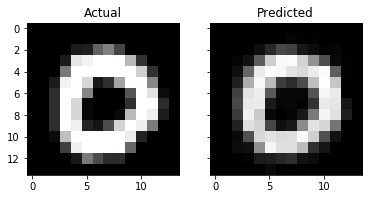

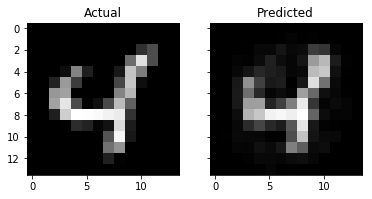

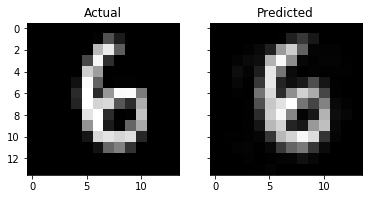

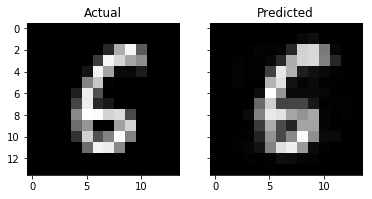

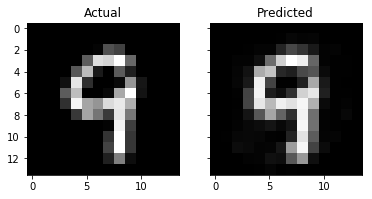

In [5]:
rand_int = np.random.randint(0,X_test.shape[0],size=(1, 5))[0]
for i in range(len(rand_int)):
    Z, Y, S_Z, S_Y = forward_pass(X_test[rand_int[i], :], W_hi, W_jh, b_h, b_o)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.title.set_text('Actual')
    ax1.imshow(np.reshape(X_test[rand_int[i],:], (14,14)), cmap = "gray")
    ax2.title.set_text('Predicted')
    ax2.imshow(np.reshape(S_Y, (14,14)), cmap = "gray")